<a href="https://colab.research.google.com/github/bartwronski/BlogPostsExtraMaterial/blob/master/Bilinear_bicubic_biquadratic_interpolation_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck


In [4]:
def biquadratic_weights(x):
  return 0.5 - x + 0.5 * x * x, x - x * x + 0.5, 0.5 * x * x

def bspline_weights(x):
  # w0 = 1.0/6.0 * (1-x)*(1-x) * (1-x)
  w1 = 2.0/3.0 - 0.5 * x*x * (2.0-x)
  w2 = 2.0/3.0 - 0.5 * (1-x)*(1-x) * (2.0-(1-x))
  w3 = 1.0/6.0 * x*x*x
  return 1.0 - w3 - w1 - w2, w1, w2, w3

def bilinear_weights(x):
  return x, 1-x

# Check the weights and if they sum to 1
for x in np.arange(0, 0.501, 0.1):
  print(x, biquadratic_weights(x), sum(biquadratic_weights(x)))
  print(x, bspline_weights(x), sum(bspline_weights(x)))
  print(x, bilinear_weights(x), sum(bilinear_weights(x)))

0.0 (0.5, 0.5, 0.0) 1.0
0.0 (0.16666666666666674, 0.6666666666666666, 0.16666666666666663, 0.0) 1.0
0.0 (0.0, 1.0) 1.0
0.1 (0.405, 0.59, 0.005000000000000001) 1.0
0.1 (0.12150000000000011, 0.6571666666666667, 0.22116666666666657, 0.0001666666666666667) 1.0
0.1 (0.1, 0.9) 1.0
0.2 (0.32, 0.66, 0.020000000000000004) 1.0
0.2 (0.08533333333333354, 0.6306666666666666, 0.28266666666666657, 0.0013333333333333335) 1.0000000000000002
0.2 (0.2, 0.8) 1.0
0.30000000000000004 (0.24499999999999997, 0.71, 0.04500000000000001) 1.0
0.30000000000000004 (0.057166666666666754, 0.5901666666666666, 0.3481666666666667, 0.004500000000000001) 1.0
0.30000000000000004 (0.30000000000000004, 0.7) 1.0
0.4 (0.18, 0.74, 0.08000000000000002) 1.0
0.4 (0.03600000000000003, 0.5386666666666666, 0.41466666666666663, 0.010666666666666668) 1.0
0.4 (0.4, 0.6) 1.0
0.5 (0.125, 0.75, 0.125) 1.0
0.5 (0.02083333333333337, 0.47916666666666663, 0.47916666666666663, 0.020833333333333332) 1.0
0.5 (0.5, 0.5) 1.0


In [0]:
def plot_spectrum(weights):
  freq = np.linspace(0, np.pi, 200)
  response = np.zeros_like(freq, dtype='complex128')
  for i, w in enumerate(weights):
    response += w * np.exp(-1j * freq * i)
  plt.plot(freq / np.pi, np.abs(response))

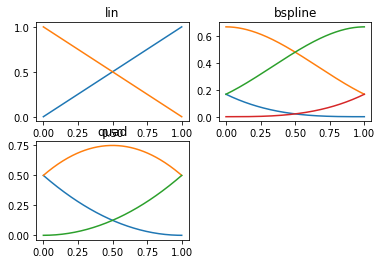

In [6]:
def plot_weights(f):
  f_input = np.linspace(0, 1.0, 200)
  response = np.zeros_like(f_input)
  filter_weights = f(f_input)
  for i, w in enumerate(filter_weights):
    plt.plot(f_input, w)
plt.subplot(2, 2, 1)
plt.title('lin')
plot_weights(bilinear_weights)
plt.subplot(2, 2, 2)
plt.title('bspline')
plot_weights(bspline_weights)
plt.subplot(2, 2, 3)
plt.title('quad')
plot_weights(biquadratic_weights)

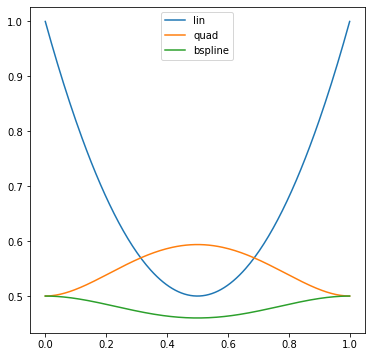

In [7]:
def plot_variance(f):
  f_input = np.linspace(0, 1.0, 200)
  response = np.zeros_like(f_input)
  filter_weights = f(f_input)
  for i, w in enumerate(filter_weights):
    response += w*w
  plt.plot(f_input, response)
plt.rcParams['figure.figsize']=6,6
plot_variance(bilinear_weights)
plot_variance(biquadratic_weights)
plot_variance(bspline_weights)
plt.legend(['lin', 'quad', 'bspline'])
plt.show()

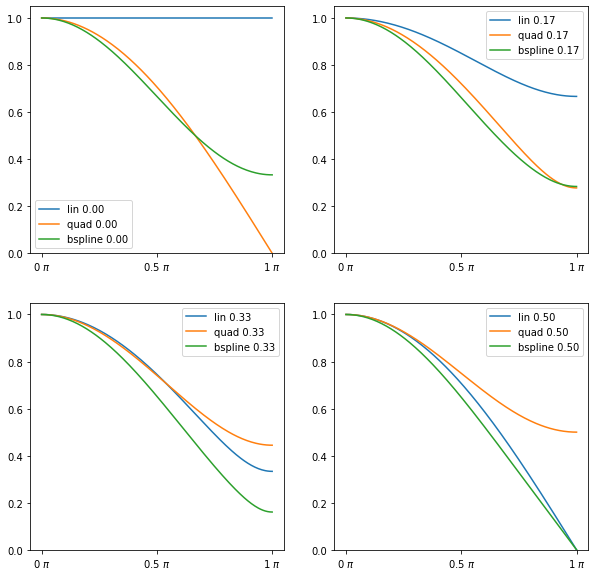

In [8]:
plt.rcParams['figure.figsize']=10,10
for a in range(4):
  ax = plt.subplot(2, 2, a + 1)
  plt.ylim(0,1.05)
  plot_spectrum(bilinear_weights(0.5 * a / 3))
  plot_spectrum(biquadratic_weights(0.5 * a / 3))
  plot_spectrum(bspline_weights(0.5 * a / 3))
  ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
  ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
  plt.legend(['lin %.2f' % (0.5 * a / 3), 'quad %.2f' % (0.5 * a / 3), 'bspline %.2f' % (0.5 * a / 3)])
plt.show()

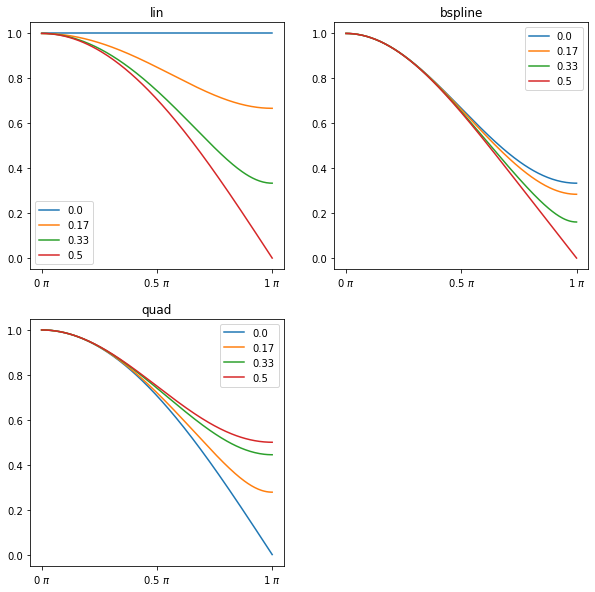

In [9]:
ax = plt.subplot(2, 2, 1)
for a in range(4):
  plot_spectrum(bilinear_weights(0.5 * a / 3))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.title('lin')
plt.legend(['0.0', '0.17', '0.33', '0.5'])

ax = plt.subplot(2, 2, 2)
for a in range(4):
  plot_spectrum(bspline_weights(0.5 * a / 3))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.title('bspline')
plt.legend(['0.0', '0.17', '0.33', '0.5'])

ax = plt.subplot(2, 2, 3)
for a in range(4):
  plot_spectrum(biquadratic_weights(0.5 * a / 3))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.legend(['0.0', '0.17', '0.33', '0.5'])
plt.title('quad')
plt.show()

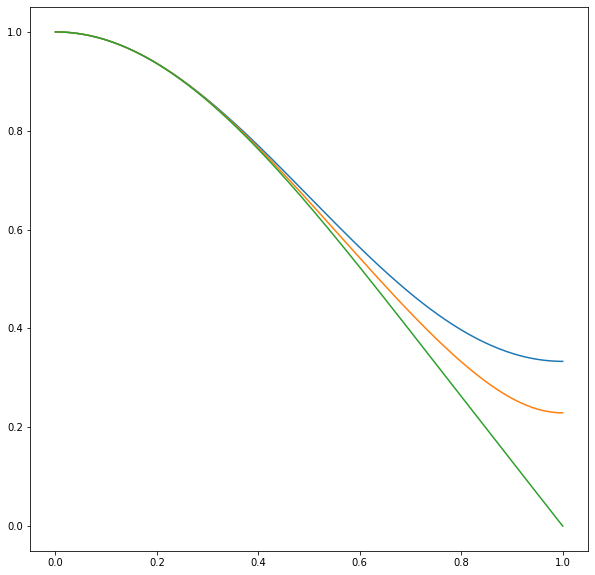

In [10]:
plot_spectrum(bspline_weights(0.0))
plot_spectrum(bspline_weights(0.25))
plot_spectrum(bspline_weights(0.5))

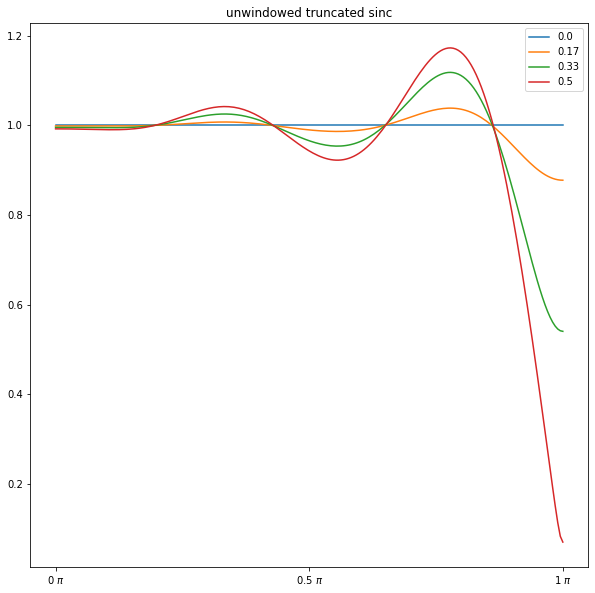

In [11]:
def sinc_weights(x):
  return np.sinc(x - 4), np.sinc(x - 3), np.sinc(x - 2), np.sinc(x - 1), np.sinc(x), np.sinc(x + 1), np.sinc(x + 2), np.sinc(x + 3), np.sinc(x + 4)

ax = plt.subplot(1, 1, 1)
for a in range(4):
  plot_spectrum(sinc_weights(0.5 * a / 3))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.legend(['0.0', '0.17', '0.33', '0.5'])
plt.title('unwindowed truncated sinc')
plt.show()